In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [25]:
a = np.array([[1,2],[3,4],[5,6]])
b = a.reshape(3,2,1)
b2 = a.reshape(3,2,1,1)
c = a.reshape(1,2,3)
print(a.shape)
print(a)
print('\n')

print(b.shape)
print(b)
print('\n')

print(c.shape)
print(c)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


(3, 2, 1)
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]


(1, 2, 3)
[[[1 2 3]
  [4 5 6]]]


----

## Convolution Neutral Network

### Conv1D :
1D 컨볼루션 레이어(예. 시간적 컨볼루션)

**keras.layers.Conv1D**(filters, kernel_size=(3,2), padding='valid', activation='relu')
- **filters** : 컨볼루션 필터의 수
- **kernel_size** : 컨볼루션 커널의 사이즈로 (row, column)을 의미
- **padding** : 경계 처리 방법
    - **'valid'** : 유효한 영역만 출력 --> 출력 이미지 사이즈는 입력 사이즈보다 작음
    - **'same'** : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
- **input_shape** : input 데이터가 첫 레이어를 통과하면서 바뀌게 되는 size
    - **모델의 첫 레이어**에서만 정의하는 것 
    - *샘플 수*를 제외한 **(행, 열, 채널 수)**로 정의. 흑백(Gray)영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정
- **activation** : 활성화 함수 설정
    - **linear** : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - **relu** : rectifier 함수, 은익층에 주로 쓰입니다.
    - **sigmoid** : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - **softmax** : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.
---
### Conv2D :
2D 컨볼루션 레이어 (예. 이미지에 대한 공간적 컨볼루션, 영상 처리에 주로 사용)

**keras.layers.Conv2D**(filters, kernel_size, padding='valid', activation=None)

*설명이 위와 똑같음*

---
### Conv3D :
3D 컨볼루션 레이어 (예. 부피에 대한 공간적 컨볼루션)

**keras.layers.Conv2D**(filters, kernel_size, padding='valid', activation=None)

*설명이 위와 똑같음*

---
**Ref** : 
- [Keras Documentation](https://keras.io/ko/layers/convolutional/)
- [컨볼루션 신경망 레이어 이야기](https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/)

- https://keras.io/ko/layers/pooling/
- https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/

In [3]:
data = datasets.load_digits()

X_data = data.images
y_data = data.target


print(data.images.shape)
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [4]:
# X_data의 shape의 마지막 1은 filter수라고 생각하면 됌
X_data = X_data.reshape((X_data.shape[0], 
                         X_data.shape[1], 
                         X_data.shape[2], 1))  # 3차원 ->4차원

y_data = to_categorical(y_data)

# train data와 test data로 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = 0.3, 
                                                    random_state = 777)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [5]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], 
                                X_data.shape[2], 
                                X_data.shape[3]), 
                 filters = 10, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 padding = 'valid'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # 이것때문에 사이즈가 줄어들음


model.add(Flatten())

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, 
              metrics = ['accuracy'])

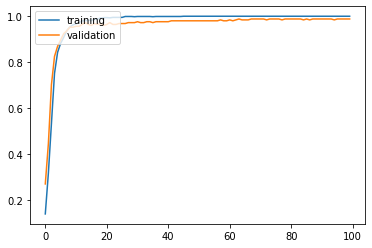

540/540 [==============================] - 0s 22us/step
Test accuracy:  0.9777777791023254


In [6]:
history = model.fit(X_train, y_train, 
                    batch_size = 50, 
                    validation_split = 0.2, 
                    epochs = 100, 
                    verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

#단순 cnn조차 금방 96% 나온다.

In [7]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Flatten())    
    model.add(Dense(50, activation = 'relu'))    
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [8]:
model = deep_cnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
activation_4 (Activation)    (None, 4, 4, 50)         

In [9]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 29.3 s


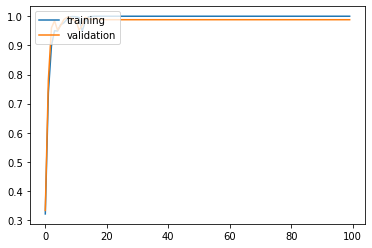

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [11]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])    # 오히려 결과가 떨어짐

540/540 [==============================] - 0s 103us/step
Test accuracy:  0.9888888597488403


---

## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [12]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [13]:
model = deep_cnn_advanced()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_8 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 50)         

In [14]:
%%time
history = model.fit(X_train, y_train, 
                    batch_size = 50, validation_split = 0.2, 
                    epochs = 100, verbose = 0)

Wall time: 52.4 s


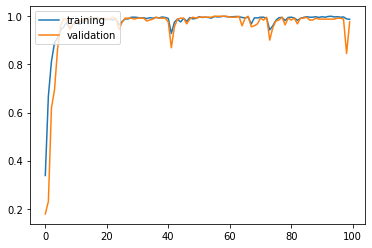

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [16]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

540/540 [==============================] - 0s 113us/step
Test accuracy:  0.979629635810852


In [17]:
# 이걸 통해서 CNN을 깊게 설계하는 것은 어렵다는 것을 알 수 있음

----

In [18]:
model = Sequential()
    
model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
    

model.add(Flatten())    
model.add(Dense(50, activation = 'relu'))    # 50은 우리가 찾아야 함
model.add(Dense(10, activation = 'softmax'))
    
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 8, 8, 10)          100       
_________________________________________________________________
activation_14 (Activation)   (None, 8, 8, 10)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                8050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 8,660
Trainable params: 8,660
Non-trainable params: 0
____________________________________________________

위에서 Parameter 개수가 100이 나온 이유는 (3 * 3 ) * 10 + 10 = 100

8050이 나온 이유는 160 * 50 + 50 = 8050

510 = 50 * 10 + 10